In [10]:
import os
import getpass
from google.colab import userdata

os.environ['OPENAI_API_KEY']=userdata.get('open_api_key')


In [2]:

from langchain_core.prompts import ChatPromptTemplate,SystemMessagePromptTemplate,HumanMessagePromptTemplate
from langchain_openai import ChatOpenAI

In [ ]:

from langchain_core.output_parsers import JsonOutputParser

# 1. Initialize the Model
# Note: Ensure you are using a valid model name (e.g., "gpt-4o" or "gpt-3.5-turbo").
lang_model = ChatOpenAI(model="gpt-5-nano", temperature=0.7)

# 2. Design the Strict Templates
system_template = """You are a Senior Comic Architect & Prompt Engineer.
Your goal is to generate a precise 6-panel script in a machine-readable JSON format.

TECHNICAL CONSTRAINTS:
1. IMAGE PROMPTS: Must be under 77 tokens. Use "Comma-Separated Keywords" rather than full sentences to maximize CLIP encoder efficiency.
2. DIALOGUE CONSISTENCY: The number of keys in the "dialogue" object must exactly match the number of characters described in the "prompt".
3. OUTPUT: Strictly raw JSON array. NO markdown blocks (```json), NO conversational filler, NO preambles.

STYLING RULE: Every prompt must conclude with "Western comic art style"."""

human_template = """Act as a backend service. Generate a 6-panel JSON list for a {kind} comic.

JSON STRUCTURE PER PANEL:
{{
  "prompt": "Subject details, Action, Environment, Lighting, Camera Angle, Western comic art style,Characters should be more than one in the same panel if the story need that",
  "narrative": "A concise, impactful caption for the panel",
  "dialogue": {{ "CharacterName": "Speech Text", "CharacterName(thinking)": "Thought Text" }}
}}

STORY ARCHITECTURE:
- Panel 1: Establishing Shot/Hook.
- Panel 2-3: Rising Action/Dialogue.
- Panel 4: Climax/Action.
- Panel 5: Reaction/Twist.
- Panel 6: Resolution/Cliffhanger.

BEGIN JSON OUTPUT:"""

# 3. Build the Prompt Template
lang_template = ChatPromptTemplate.from_messages([
    SystemMessagePromptTemplate.from_template(system_template),
    HumanMessagePromptTemplate.from_template(human_template)
])

# 4. Use JsonOutputParser instead of StrOutputParser
# This forces LangChain to automatically convert the LLM's string into an actual Python list/dictionary!
parser = JsonOutputParser()

# 5. Create and Invoke the Chain
lang_chain = lang_template | lang_model | parser

# Example execution
# story_kind = "fantasy"
story_idea = "cyberpunk detective solving a neon-city murder"
try:
    comic1_data = lang_chain.invoke({"kind": story_idea})
    print(comic1_data) # This will now be a perfect Python list of dictionaries!
except Exception as e:
    print(f"Parsing Error: {e}")

In [16]:
comic_data #fantasy

[{'prompt': 'Lyra, Bran, portal awakening, ancient ruin, mist, dawn light, wide establishing shot, low camera angle, two characters, Western comic art style',
  'narrative': 'Ancient portal awakens; Lyra and Bran step inside.',
  'dialogue': {'Lyra': 'Bran, the portal stirs.',
   'Bran': 'Stay sharp, mage.'}},
 {'prompt': 'Lyra, Bran, glyphs glow, rune portal, shadow wraith, ruined archway interior, torchlight flicker, dramatic shadows, close-up, Western comic art style',
  'narrative': 'Glyphs flare; danger closes in.',
  'dialogue': {'Lyra': 'The glyphs align with my sigil.',
   'Bran': 'Wraith favors no one; ready your blade.'}},
 {'prompt': 'Lyra, Bran, portal hum, glyphs glow brighter, sigil staff, cave chamber, floating motes, cyan light, low angle, Western comic art style',
  'narrative': 'The glyphs blaze; Lyra and Bran brace for impact.',
  'dialogue': {'Lyra': 'Brace yourself; the portal wants more.',
   'Bran': 'Then give it your sigils and steel.'}},
 {'prompt': 'Lyra, Bran

In [7]:
comic1_data=[{'prompt': 'cyberpunk detective duo, rain-soaked neon city street, holographic ads, neon glow, wide establishing shot, low-angle, Detective Nova Kade, Netwright, Characters should be more than one in the same panel if the story need that, Western comic art style',
  'narrative': 'Neon rain baptizes a city of secrets as the duo begins the hunt.',
  'dialogue': {'Detective Nova Kade': 'Netwright, the city hides the truth in neon.',
   'Netwright': 'Initializing city-wide scan, tracing encrypted traces.'}},
 {'prompt': 'investigation scene, detective duo analyze holo-clue in hacker den, flickering monitors, rain-dappled window, cyan backlight, close-up, Detective Nova Kade, Netwright, Characters should be more than one in the same panel if the story need that, Western comic art style',
  'narrative': 'Holo-clue flickers to life, clues collide with doubt.',
  'dialogue': {'Detective Nova Kade': 'Trace the holo-clue, cross-check server logs.',
   'Netwright': 'Traffic spikes align, masked alias repeating.'}},
 {'prompt': 'conflict with cybernetically-enhanced suspect, neon-lit rooftop, city skyline, rain, dramatic backlight, medium shot, Detective Nova Kade, Netwright, Characters should be more than one in the same panel if the story need that, Western comic art style',
  'narrative': 'False IDs and a rain-soaked rooftop reveal a deeper pattern.',
  'dialogue': {'Detective Nova Kade': 'There—false ID on the rooftop feed.',
   'Netwright': 'Coat fragment links to a corporate courier.'}},
 {'prompt': 'climactic pursuit, Detective Nova Kade and Netwright corner neon-lit corridor killer, spinning signage, motion blur, low-angle, Characters should be more than one in the same panel if the story need that, Western comic art style',
  'narrative': 'Confrontation peaks as doors close and the suspect stumbles.',
  'dialogue': {'Detective Nova Kade': "Freeze! You're cornered.",
   'Netwright': 'Shutters lock; route blocked; no escape.'}},
 {'prompt': 'reveal of killer motive, Detective Nova Kade and Netwright react, holographic city map projection, rain-soaked alley, backlit, medium shot, Characters should be more than one in the same panel if the story need that, Western comic art style',
  'narrative': 'Motive exposed; a web of power ties city to the crime.',
  'dialogue': {'Detective Nova Kade': 'Your motive is a lie; the map exposes the truth.',
   'Netwright': 'City grid motive: control, power, and pain.'}},
 {'prompt': 'aftermath rooftop scene, Detective Nova Kade and Netwright overlook neon city, dawn haze, rain-softened glow, wide-angle, cliffhanger, Western comic art style',
  'narrative': 'Dawn breaks over neon, but the shadows whisper of a bigger threat.',
  'dialogue': {'Detective Nova Kade': 'The case closes for now, but the undercity keeps watching.',
   'Netwright': 'New link surfaces; the shadows wake up anew.'}}]

In [25]:
comic1_data

[{'prompt': 'cyberpunk detective duo, rain-soaked neon city street, holographic ads, neon glow, wide establishing shot, low-angle, Detective Nova Kade, Netwright, Characters should be more than one in the same panel if the story need that, Western comic art style',
  'narrative': 'Neon rain baptizes a city of secrets as the duo begins the hunt.',
  'dialogue': {'Detective Nova Kade': 'Netwright, the city hides the truth in neon.',
   'Netwright': 'Initializing city-wide scan, tracing encrypted traces.'}},
 {'prompt': 'investigation scene, detective duo analyze holo-clue in hacker den, flickering monitors, rain-dappled window, cyan backlight, close-up, Detective Nova Kade, Netwright, Characters should be more than one in the same panel if the story need that, Western comic art style',
  'narrative': 'Holo-clue flickers to life, clues collide with doubt.',
  'dialogue': {'Detective Nova Kade': 'Trace the holo-clue, cross-check server logs.',
   'Netwright': 'Traffic spikes align, masked 

In [5]:
%%writefile overlay_textt.py
from PIL import Image, ImageDraw, ImageFont
import os
import textwrap

def wrap_text(text, width=3):
    """Split text into lines"""
    words = text.split()
    lines = [' '.join(words[i:i+width]) for i in range(0, len(words), width)]
    return '\n'.join(lines)

def draw_bubble(draw, text, position, font):
    """Draw a perfect Circle bubble"""
    wrapped_text = wrap_text(text, width=3)
    bbox = draw.multiline_textbbox((0, 0), wrapped_text, font=font, spacing=4)
    text_w = bbox[2] - bbox[0]
    text_h = bbox[3] - bbox[1]

    # To make it a circle, we take the larger dimension and add padding
    side = max(text_w, text_h) + 40

    # Calculate the center based on the original requested position
    center_x = position[0] + text_w / 2
    center_y = position[1] + text_h / 2

    # Define square bounding box for a perfect circle
    left = center_x - side/2
    top = center_y - side/2
    right = center_x + side/2
    bottom = center_y + side/2

    # Draw circle
    draw.ellipse([left, top, right, bottom], fill="white", outline="black", width=3)

    # Draw tail
    tail_tip_y = bottom + 15
    tail = [(center_x - 10, bottom - 2), (center_x, tail_tip_y), (center_x + 10, bottom - 2)]
    draw.polygon(tail, fill="white", outline="black")

    # Draw text centered in the circle
    text_pos = (center_x - text_w / 2, center_y - text_h / 2)
    draw.multiline_text(text_pos, wrapped_text, font=font, fill="black", align="center", spacing=4)

def process_comic_panels(model_name, panels_data):
    """Processes image panels with circular text overlays."""
    input_dir = f"output1/{model_name.lower().replace('-', '_')}"
    output_dir = f"output1/{model_name.lower().replace('-', '_')}_final"
    os.makedirs(output_dir, exist_ok=True)
    try:
        font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf", 22)
    except:
        font = ImageFont.load_default()
    processed_images = []
    for i, panel in enumerate(panels_data):
        img_path = os.path.join(input_dir, f"panel_{i+1}.png")
        if not os.path.exists(img_path): continue
        img = Image.open(img_path).convert("RGB")
        draw = ImageDraw.Draw(img)

        # Simple positioning logic for multiple bubbles
        for idx, (char, msg) in enumerate(panel['dialogue'].items()):
            bubble_text = f"{char}: {msg}"
            # Offset each bubble so they don't overlap perfectly
            current_x = 100 + (idx * 350)
            current_y = 100 + (idx * 50)
            draw_bubble(draw, bubble_text, (current_x, current_y), font)

        temp_path = os.path.join(output_dir, f"res_panel_{i+1}.png")
        img.save(temp_path)
        processed_images.append(temp_path)
    print(f"Finished processing {len(processed_images)} panels with circular bubbles.")

Overwriting overlay_textt.py


In [ ]:
pip install diffusers

In [14]:
import torch
import os
from diffusers import DiffusionPipeline
from PIL import Image
import importlib
import overlay_textt

# 1. Force reload the fixed module
importlib.reload(overlay_textt)
from overlay_textt import process_comic_panels

# 2. Load the AI Model with memory optimizations
print("Loading AI Model...")
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
)

pipe.enable_model_cpu_offload()
pipe.enable_vae_slicing()

def generate_real_images(model_name, comic_panels):
    print(f"\nStarting generation for: {model_name}")
    output_dir = f"output1/{model_name.lower().replace('-', '_')}"
    os.makedirs(output_dir, exist_ok=True)

    style_suffix = ", western comic book style, high ink detail"

    for i, panel_data in enumerate(comic_panels):
        image_path = os.path.join(output_dir, f"panel_{i+1}.png")
        full_prompt = panel_data["prompt"] + style_suffix
        print(f"  > Generating Panel {i+1}...")

        image = pipe(
            prompt=full_prompt,
            num_inference_steps=30,
            guidance_scale=7.5
        ).images[0]

        image.save(image_path)
        print(f"  [SAVED] {image_path}")
    return output_dir

# 3. Run the full process
torch.cuda.empty_cache()
model_name = "SDXL-Base"

if 'comic1_data' in globals():
    generate_real_images(model_name, comic1_data)
    print(f"\nAdding text overlays...")
    process_comic_panels(model_name, comic1_data)
    print("\nALL PROCESSES COMPLETE!")
else:
    print("Error: 'comic1_data' not found. Please run the script generation cell first.")

Loading AI Model...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/517 [00:00<?, ?it/s]


Starting generation for: SDXL-Base
  > Generating Panel 1...


  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/diffusers/pipelines/stable_diffusion_xl/pipeline_stable_diffusion_xl.py:748: FutureWarning: `upcast_vae` is deprecated and will be removed in version 1.0.0. `upcast_vae` is deprecated. Please use `pipe.vae.to(torch.float32)`. For more details, please refer to: https://github.com/huggingface/diffusers/pull/12619#issue-3606633695.
  deprecate(


  [SAVED] output1/sdxl_base/panel_1.png
  > Generating Panel 2...


  0%|          | 0/30 [00:00<?, ?it/s]

  [SAVED] output1/sdxl_base/panel_2.png
  > Generating Panel 3...


  0%|          | 0/30 [00:00<?, ?it/s]

  [SAVED] output1/sdxl_base/panel_3.png
  > Generating Panel 4...


  0%|          | 0/30 [00:00<?, ?it/s]

  [SAVED] output1/sdxl_base/panel_4.png
  > Generating Panel 5...


  0%|          | 0/30 [00:00<?, ?it/s]

  [SAVED] output1/sdxl_base/panel_5.png
  > Generating Panel 6...


  0%|          | 0/30 [00:00<?, ?it/s]

  [SAVED] output1/sdxl_base/panel_6.png

Adding text overlays...
Finished processing 6 panels with circular bubbles.

ALL PROCESSES COMPLETE!


In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def show_images(path):
  folder_path = path
  image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

  image_files.sort()

  image_files = image_files[:6]

  fig, axes = plt.subplots(2, 3, figsize=(15, 10))
  axes = axes.flatten()


  for i, img_name in enumerate(image_files):
      img_path = os.path.join(folder_path, img_name)
      img = mpimg.imread(img_path)

      axes[i].imshow(img)
      axes[i].set_title(f"Panel {i+1}", fontsize=12)
      axes[i].axis('off')


  plt.tight_layout()
  plt.show()

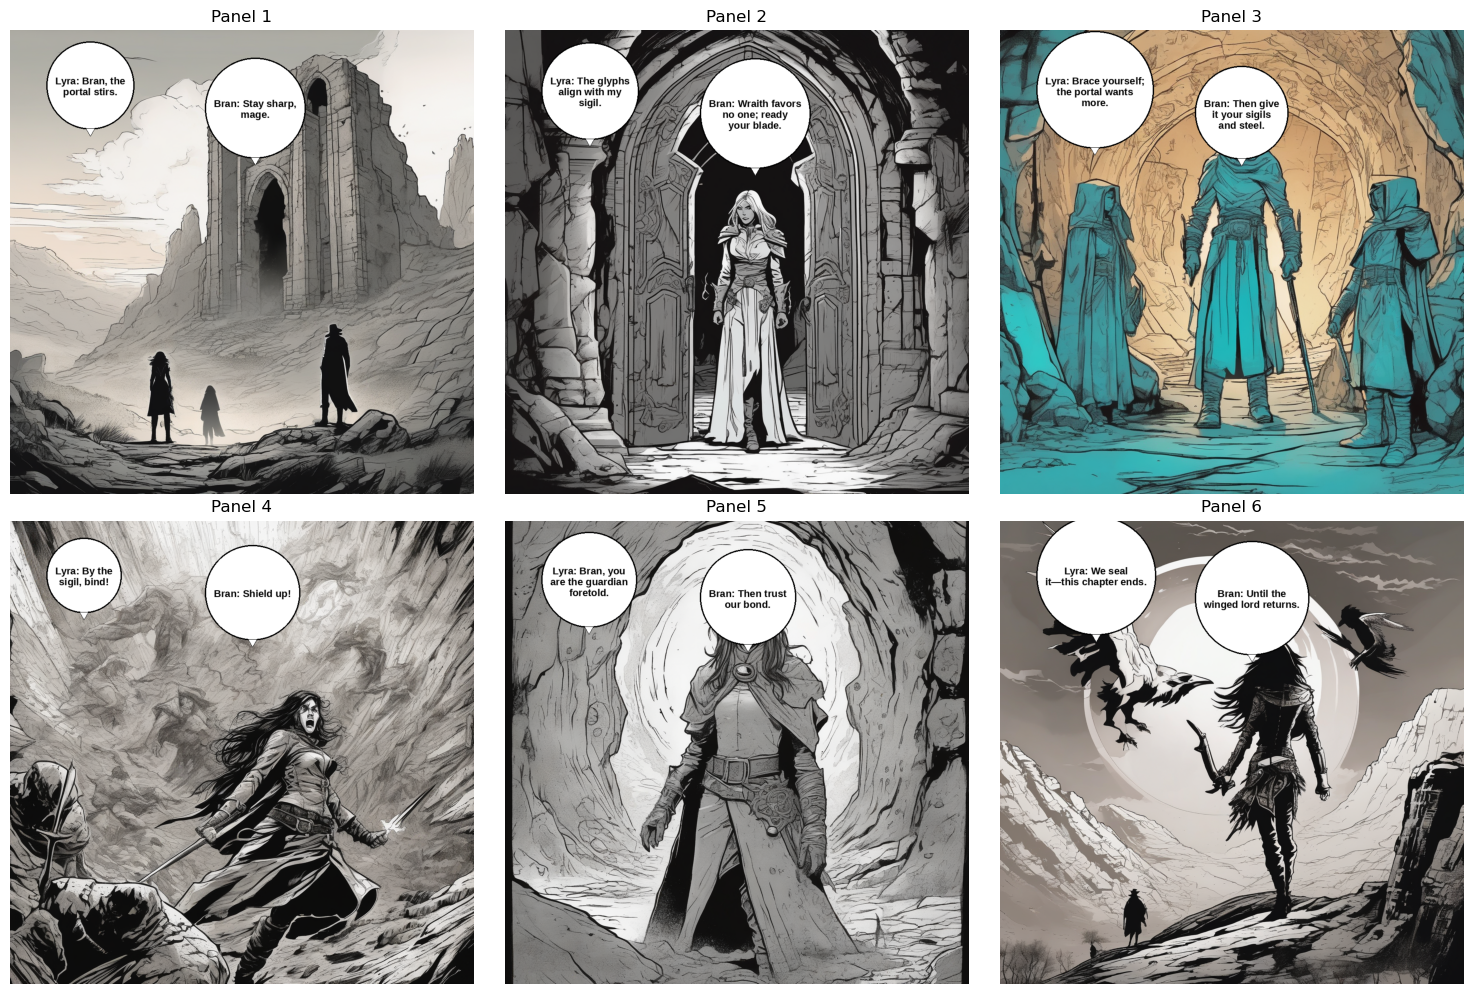

In [4]:
# Show the final results with circular bubbles
show_images(r"G:\DEBI\Assinments\My-AI-Journey\commic book with ai\fantasy\sdxl_base_final")

In [7]:
from PIL import Image
import os

def create_comic_page(image_folder, output_name="comic_page.jpg"):
    
    images = [os.path.join(image_folder, f) for f in sorted(os.listdir(image_folder)) if f.endswith(('.png', '.jpg', '.jpeg'))][:6]
    
    if len(images) < 6:
        print("Error: The folder contains less than 6 images!")
        return

    
    loaded_images = [Image.open(img).resize((800, 800)) for img in images]

    
    page_width = 800 * 3
    page_height = 800 * 2
    new_page = Image.new('RGB', (page_width, page_height), 'white')

    
    for index, img in enumerate(loaded_images):
        x = (index % 3) * 800  # العمود
        y = (index // 3) * 800 # الصف
        new_page.paste(img, (x, y))

   
    new_page.save(output_name, quality=95)
    print(f"Done: {output_name}")



In [10]:
create_comic_page(r"G:\DEBI\Assinments\My-AI-Journey\commic book with ai\fantasy\sdxl_base_final", output_name="fantasy_comic_page.jpg")

Done: fantasy_comic_page.jpg


In [ ]:
# !pip install git+https://github.com/openai/CLIP.git

In [23]:
import torch
import clip
from PIL import Image
import os

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

def evaluate_diffusion_output(image_path, prompt_text):
    """
    Evaluates the image against the text prompt using CLIP.
    """
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    # The error was here: prompt must be a string, not a dict
    text = clip.tokenize([prompt_text]).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image)
        text_features = model.encode_text(text)

        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)
        similarity = (image_features @ text_features.T).item()

    prompt_adherence = round(similarity * 100, 2)
    aesthetic_proxy = round(torch.std(image_features).item() * 100, 2)

    return {
        "Prompt Adherence (CLIP Score)": prompt_adherence,
        "Aesthetic Quality": aesthetic_proxy,
        "Status": "High Quality" if prompt_adherence > 25 else "Needs Refinement"
    }

def evaluate_comic_book(image_folder, comic_data_list):
    """
    Iterates through images and evaluates them against the corresponding prompts.
    """
    results = {}
    # Filter and sort image files
    image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

    for idx, image_file in enumerate(image_files):
        if idx < len(comic_data_list):
            image_path = os.path.join(image_folder, image_file)
            # FIX: Extract the 'prompt' string from the dictionary
            prompt_text = comic_data_list[idx]['prompt']

            print(f"Evaluating {image_file}...")
            panel_results = evaluate_diffusion_output(image_path, prompt_text)
            results[image_file] = panel_results

    return results

image_folder = "/content/output/sdxl_base_final"

if os.path.exists(image_folder) and 'comic_data' in globals():
    results = evaluate_comic_book(image_folder, comic_data)
    print(f"\n--- Evaluation Results ---")
    for panel, result in results.items():
        print(f"Panel: {panel}")
        for metric, value in result.items():
            print(f"  {metric}: {value}")
        print("---")
else:
    print("Folder or comic_data not found. Ensure generation is finished.")

Evaluating res_panel_1.png...
Evaluating res_panel_2.png...
Evaluating res_panel_3.png...
Evaluating res_panel_4.png...
Evaluating res_panel_5.png...
Evaluating res_panel_6.png...

--- Evaluation Results ---
Panel: res_panel_1.png
  Prompt Adherence (CLIP Score): 30.71
  Aesthetic Quality: 4.42
  Status: High Quality
---
Panel: res_panel_2.png
  Prompt Adherence (CLIP Score): 30.88
  Aesthetic Quality: 4.42
  Status: High Quality
---
Panel: res_panel_3.png
  Prompt Adherence (CLIP Score): 28.12
  Aesthetic Quality: 4.42
  Status: High Quality
---
Panel: res_panel_4.png
  Prompt Adherence (CLIP Score): 28.56
  Aesthetic Quality: 4.42
  Status: High Quality
---
Panel: res_panel_5.png
  Prompt Adherence (CLIP Score): 25.9
  Aesthetic Quality: 4.42
  Status: High Quality
---
Panel: res_panel_6.png
  Prompt Adherence (CLIP Score): 29.15
  Aesthetic Quality: 4.42
  Status: High Quality
---


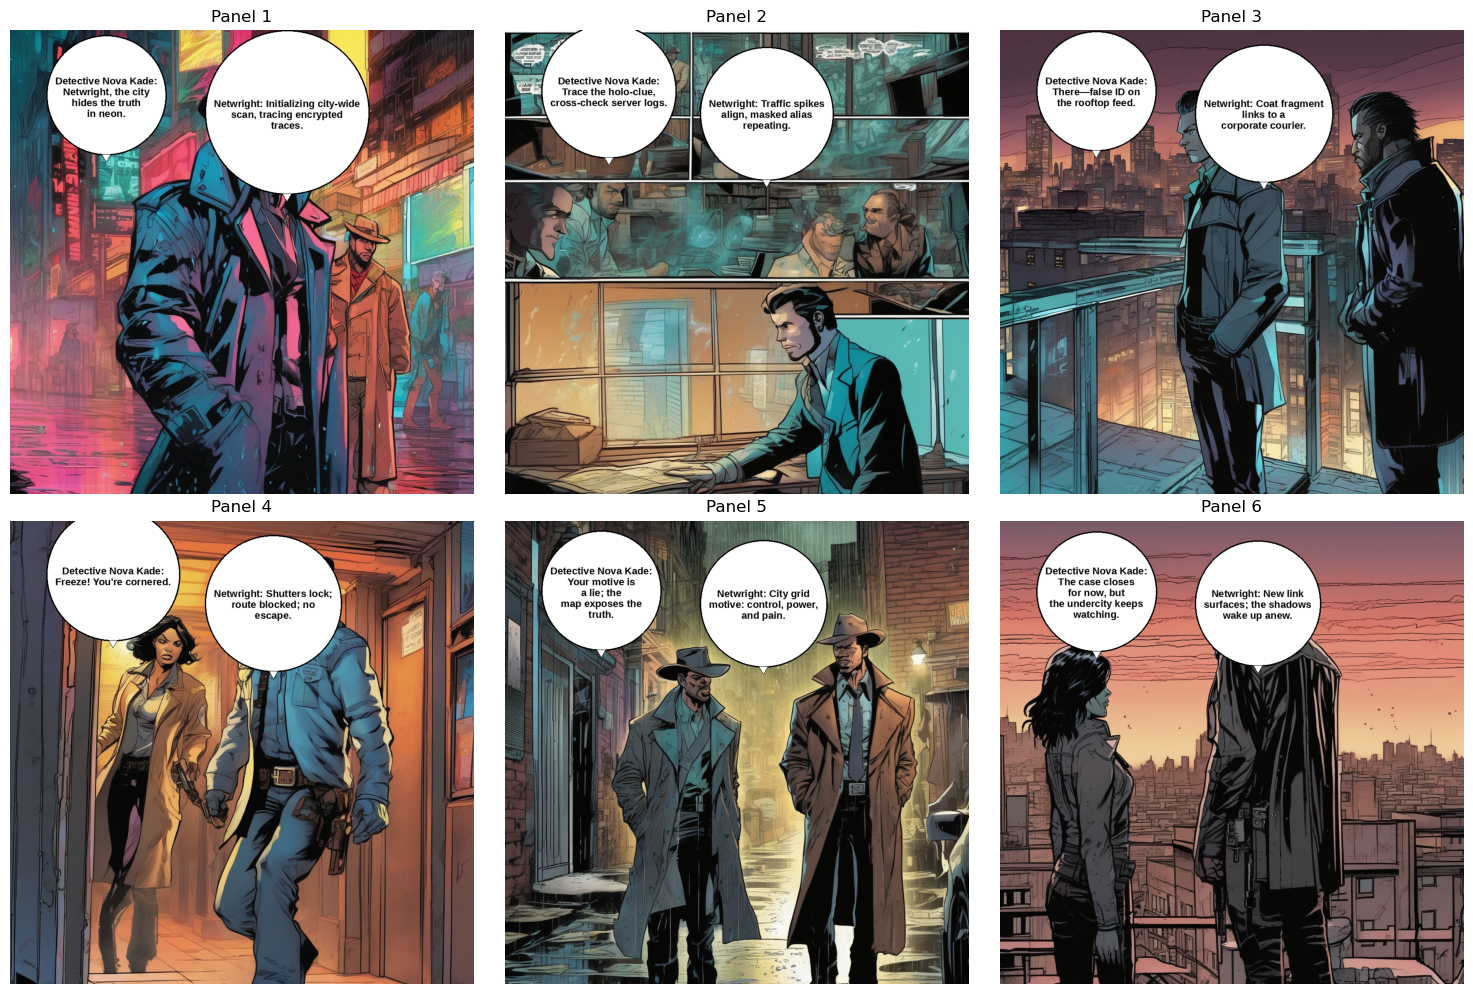

In [3]:
# Show the final results with circular bubbles
show_images(r"G:\DEBI\Assinments\My-AI-Journey\commic book with ai\cyberpunc\sdxl_base_final")

In [11]:
create_comic_page(r"G:\DEBI\Assinments\My-AI-Journey\commic book with ai\fantasy\sdxl_base_final", output_name="cyperpunk_comic_page.jpg")

Done: cyperpunk_comic_page.jpg


In [ ]:
import torch
import clip
from PIL import Image
import os

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

def evaluate_diffusion_output(image_path, prompt_text):
    """
    Evaluates the image against the text prompt using CLIP.
    """
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    
    text = clip.tokenize([prompt_text]).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image)
        text_features = model.encode_text(text)

        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)
        similarity = (image_features @ text_features.T).item()

    prompt_adherence = round(similarity * 100, 2)
    aesthetic_proxy = round(torch.std(image_features).item() * 100, 2)

    return {
        "Prompt Adherence (CLIP Score)": prompt_adherence,
        "Aesthetic Quality": aesthetic_proxy,
        "Status": "High Quality" if prompt_adherence > 25 else "Needs Refinement"
    }

def evaluate_comic_book(image_folder, comic_data_list):
    """
    Iterates through images and evaluates them against the corresponding prompts.
    """
    results = {}
    # Filter and sort image files
    image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

    for idx, image_file in enumerate(image_files):
        if idx < len(comic_data_list):
            image_path = os.path.join(image_folder, image_file)
            
            prompt_text = comic_data_list[idx]['prompt']

            print(f"Evaluating {image_file}...")
            panel_results = evaluate_diffusion_output(image_path, prompt_text)
            results[image_file] = panel_results

    return results

image_folder = "/content/output1/sdxl_base_final"

if os.path.exists(image_folder) and 'comic1_data' in globals():
    results = evaluate_comic_book(image_folder, comic1_data)
    print(f"\n--- Evaluation Results ---")
    for panel, result in results.items():
        print(f"Panel: {panel}")
        for metric, value in result.items():
            print(f"  {metric}: {value}")
        print("---")
else:
    print("Folder or comic1_data not found. Ensure generation is finished.")

Evaluating res_panel_1.png...
Evaluating res_panel_2.png...
Evaluating res_panel_3.png...
Evaluating res_panel_4.png...
Evaluating res_panel_5.png...
Evaluating res_panel_6.png...

--- Evaluation Results ---
Panel: res_panel_1.png
  Prompt Adherence (CLIP Score): 32.96
  Aesthetic Quality: 4.43
  Status: High Quality
---
Panel: res_panel_2.png
  Prompt Adherence (CLIP Score): 30.18
  Aesthetic Quality: 4.42
  Status: High Quality
---
Panel: res_panel_3.png
  Prompt Adherence (CLIP Score): 32.76
  Aesthetic Quality: 4.42
  Status: High Quality
---
Panel: res_panel_4.png
  Prompt Adherence (CLIP Score): 31.74
  Aesthetic Quality: 4.43
  Status: High Quality
---
Panel: res_panel_5.png
  Prompt Adherence (CLIP Score): 34.42
  Aesthetic Quality: 4.42
  Status: High Quality
---
Panel: res_panel_6.png
  Prompt Adherence (CLIP Score): 29.96
  Aesthetic Quality: 4.43
  Status: High Quality
---
